In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import pickle

## Load images

In [2]:
cars_0 = glob.glob('./vehicles/GTI_Far/*.png')
cars_1 = glob.glob('./vehicles/GTI_MiddleClose/*.png')
cars_2 = glob.glob('./vehicles/GTI_Left/*.png')
cars_3 = glob.glob('./vehicles/GTI_Right/*.png')
cars_4 = glob.glob('./vehicles/KITTI_extracted/*.png')

notcars_1 = glob.glob('./non-vehicles/Extras/*.png')
notcars_2 = glob.glob('./non-vehicles/GTI/*.png')

In [3]:
print("Total number of cars {}".format(len(cars_0)+len(cars_1)+len(cars_2)+len(cars_3)+len(cars_4)))

Total number of cars 8792


In [4]:
print("Total number of notcars {}".format(len(notcars_1)+len(notcars_2)))

Total number of notcars 8968


### concatenate the arrays and shuffle

In [19]:
cars = cars_0 + cars_1 + cars_2 + cars_3 + cars_4
print(cars[-5:])
np.random.shuffle(cars)
print(cars[-5:])

['./vehicles/KITTI_extracted\\995.png', './vehicles/KITTI_extracted\\996.png', './vehicles/KITTI_extracted\\997.png', './vehicles/KITTI_extracted\\998.png', './vehicles/KITTI_extracted\\999.png']
['./vehicles/KITTI_extracted\\1834.png', './vehicles/GTI_Left\\image0774.png', './vehicles/GTI_Left\\image0905.png', './vehicles/KITTI_extracted\\1039.png', './vehicles/GTI_Far\\image0136.png']


In [21]:
notcars = notcars_1 + notcars_2
print(notcars[-5:])
np.random.shuffle(notcars)
print(notcars[-5:])

['./non-vehicles/GTI\\image995.png', './non-vehicles/GTI\\image996.png', './non-vehicles/GTI\\image997.png', './non-vehicles/GTI\\image998.png', './non-vehicles/GTI\\image999.png']
['./non-vehicles/Extras\\extra4161.png', './non-vehicles/GTI\\image3129.png', './non-vehicles/Extras\\extra613.png', './non-vehicles/GTI\\image2946.png', './non-vehicles/GTI\\image1479.png']


### Split into train validation and test and save pickle!

In [24]:
# split 70% training 20% validation 10% test set
frac1 = 0.7
l0,l1 = len(cars),len(notcars)
L1 = (frac1*np.array([l0,l1])).astype('int')
frac2 = 0.9
l0,l1 = len(cars),len(notcars)
L2 = (frac2*np.array([l0,l1])).astype('int')

cars_train = cars[:L1[0]]
notcars_train = notcars[:L1[1]]

cars_val = cars[L1[0]:L2[0]]
notcars_val = notcars[L1[1]:L2[1]]

cars_test = cars[L2[0]:]
notcars_test = notcars[L2[1]:]

print('Number of samples in cars training set: ', len(cars_train))
print('Number of samples in notcars training set: ', len(notcars_train))

print('Number of samples in cars validation set: ', len(cars_val))
print('Number of samples in notcars validation set: ', len(notcars_val))

print('Number of samples in cars test set: ',len(cars_test))
print('Number of samples in notcars test set: ',len(notcars_test))

[6154 6277]
[7912 8071]
Number of samples in cars training set:  6154
Number of samples in notcars training set:  6277
Number of samples in cars validation set:  1758
Number of samples in notcars validation set:  1794
Number of samples in cars test set:  880
Number of samples in notcars test set:  897


In [25]:
# Save to pickle
pickle_file = 'cars_data.p'
print('Saving...')
try:
    with open(pickle_file, 'wb') as pfile:
        pickle.dump(
            {
                'cars_train': cars_train,
                'notcars_train': notcars_train,
                'cars_val': cars_val,
                'notcars_val': notcars_val,
                'cars_test': cars_test,
                'notcars_test': notcars_test
            },
            pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

print('Data cached in pickle file.')

Saving...
Data cached in pickle file.


### Sanity check... just to be sure ...

In [28]:
cars_ds_file = 'cars_data.p'
with open(cars_ds_file, mode='rb') as f:
    ds = pickle.load(f)
cars_train = ds['cars_train']
notcars_train = ds['notcars_train']
cars_val = ds['cars_val']
notcars_val = ds['notcars_val']
cars_test = ds['cars_test']
notcars_test = ds['notcars_test']

print("dataset loaded")

dataset loaded


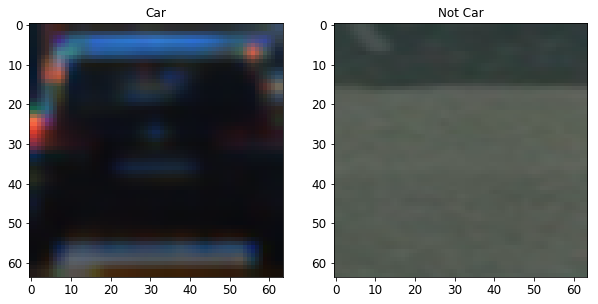

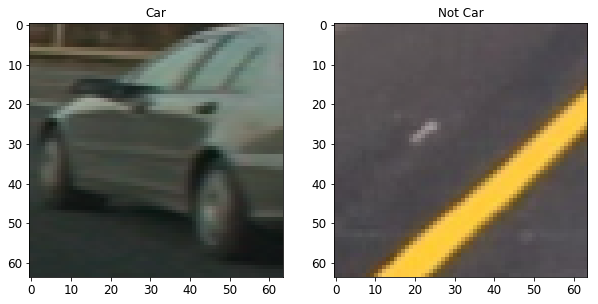

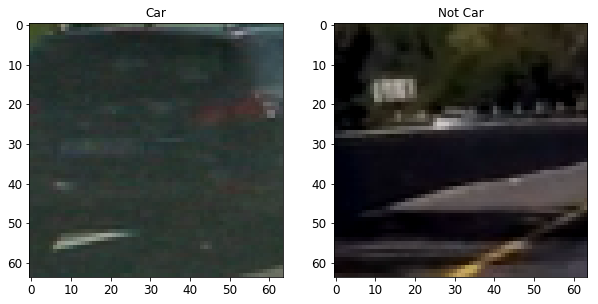

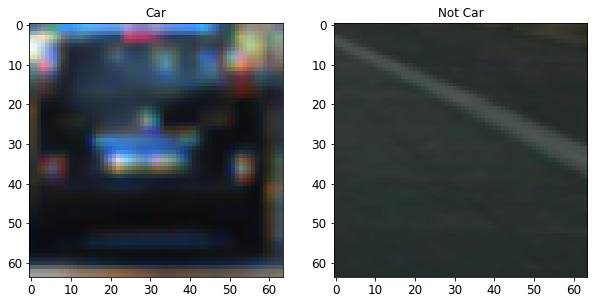

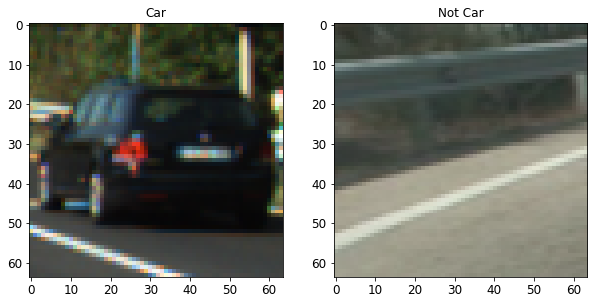

In [34]:
import random

for i in range(5):
    ix = random.randint(1, len(cars_train))
    #print some plots
    font_size=12
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.imshow(plt.imread(cars_train[ix]))
    ax1.set_title('Car', fontsize=font_size)
    ax2.imshow(plt.imread(notcars_train[ix]))
    ax2.set_title('Not Car', fontsize=font_size)
    plt.show()